# Feature Engineering

**Note:** goal is to convert categorical variables into numerical representations to be used in modeling, such as assigning numerical codes to gender and room type categories. Also, drop not needed columns. Moreover, handle outliers from few columns.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import Clean Data

In [2]:
clean_data = pd.read_csv('../data/cleaned_data.csv')

clean_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,total_of_host_listings_count
0,879181,287172,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,female,2
1,6606,14942,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,0.95,99,2,fab privat seattl urban cottag,female,3
2,902609,3264544,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,1.95,206,27,entir guest suit inest seattl,male,5
3,9419,30559,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,1.14,356,20,gloriou sun room memori foamb,male,9
4,226536,209571,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,female,1


## Convert Categorical Variables into Numerical Representations

In [3]:
clean_data.shape

(4917, 16)

In [4]:
# For the 'assumed_gender' column, you can assign numerical codes to the gender categories. 
# make 'female' as 1 and 'male' as 0:
clean_data['assumed_gender'] = clean_data['assumed_gender'].map({'female': 1, 'male': 0})

clean_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,total_of_host_listings_count
0,879181,287172,Central Area,Atlantic,47.60096,-122.30190,Private room,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,1,2
1,6606,14942,Other neighborhoods,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,0.95,99,2,fab privat seattl urban cottag,1,3
2,902609,3264544,Delridge,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,1.95,206,27,entir guest suit inest seattl,0,5
3,9419,30559,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,175,1.14,356,20,gloriou sun room memori foamb,0,9
4,226536,209571,Magnolia,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,1,1


In [5]:
# Perform one-hot encoding on 'room_type'
one_hot_encoded = pd.get_dummies(clean_data['room_type'], prefix='room_type')

# Perform one-hot encoding on 'neighbourhood_group'
one_hot_neighbourhood_group = pd.get_dummies(clean_data['neighbourhood_group'], prefix='neighbourhood_group')

# Perform one-hot encoding on 'neighbourhood'
one_hot_neighbourhood = pd.get_dummies(clean_data['neighbourhood'], prefix='neighbourhood')

# Drop the original columns
clean_data_encoded = clean_data.drop(['room_type', 'neighbourhood_group', 'neighbourhood'], axis=1)

# Concatenate the one-hot encoded columns with the original dataframe
clean_data_encoded = pd.concat([clean_data_encoded, one_hot_encoded, one_hot_neighbourhood_group, one_hot_neighbourhood], axis=1)

In [6]:
clean_data_encoded.shape

(4917, 120)

In [7]:
clean_data_encoded.head().T

,0,1,2,3,4
id,879181,6606,902609,9419,226536
host_id,287172,14942,3264544,30559,209571
latitude,47.60096,47.65444,47.52383,47.55017,47.66133
longitude,-122.3019,-122.33629,-122.35287,-122.31937,-122.40088
price,53,99,70,55,61
...,...,...,...,...,...
neighbourhood_West Woodland,0,0,0,0,0
neighbourhood_Westlake,0,0,0,0,0
neighbourhood_Whittier Heights,0,0,0,0,0
neighbourhood_Windermere,0,0,0,0,0


## Drop Unnecessary Columns (Based to EDA process)

In [8]:
clean_data_encoded = clean_data_encoded.drop(['id', 'host_id'], axis = 1)

clean_data_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace
0,47.60096,-122.30190,53,30,99,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,0,0
1,47.65444,-122.33629,99,30,159,0.95,99,2,fab privat seattl urban cottag,1,...,0,0,1,0,0,0,0,0,0,0
2,47.52383,-122.35287,70,2,238,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,0,0
3,47.55017,-122.31937,55,2,175,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,0,0
4,47.66133,-122.40088,61,1,316,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
clean_data_encoded.shape

(4917, 118)

## Handling Outliers (Based to EDA process)

**Note:** based on EDA: 'price', 'minimum_nights', 'number_of_reviews', and 'total_of_host_listings_count' have a lot of outliers.

In [10]:
columns = ['latitude', 'longitude', 'price', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month', 'availability_365', 
           'number_of_reviews_ltm', 'total_of_host_listings_count']

clean_data_encoded[columns].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
latitude,4917.0,47.63,0.05,47.50,47.60,47.63,47.67,47.73
longitude,4917.0,-122.33,0.03,-122.42,-122.36,-122.33,-122.31,-122.24
price,4917.0,166.21,165.98,10.00,94.00,131.00,193.00,4000.00
minimum_nights,4917.0,6.23,11.67,1.00,1.00,2.00,3.00,180.00
number_of_reviews,4917.0,77.56,109.38,0.00,9.00,35.00,99.00,1251.00
reviews_per_month,4917.0,2.23,1.94,0.00,0.71,1.80,3.28,22.70
availability_365,4917.0,174.56,118.53,0.00,71.00,161.00,281.00,365.00
number_of_reviews_ltm,4917.0,22.17,24.38,0.00,3.00,15.00,34.00,406.00
total_of_host_listings_count,4917.0,8.62,16.67,1.00,1.00,2.00,6.00,91.00


In [11]:
columns_with_outliers = ['price', 'minimum_nights', 'number_of_reviews', 'total_of_host_listings_count']

clean_data_encoded[columns_with_outliers].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,4917.0,166.21,165.98,10.0,94.0,131.0,193.0,4000.0
minimum_nights,4917.0,6.23,11.67,1.0,1.0,2.0,3.0,180.0
number_of_reviews,4917.0,77.56,109.38,0.0,9.0,35.0,99.0,1251.0
total_of_host_listings_count,4917.0,8.62,16.67,1.0,1.0,2.0,6.0,91.0


In [12]:
# Loop through each column and apply outlier treatment
for column in columns_with_outliers:
    
    # Set the lower and upper thresholds for capping
    # 1st percentile
    lower_threshold = clean_data_encoded[column].quantile(0.01)
    # 95th percentile
    upper_threshold = clean_data_encoded[column].quantile(0.95)
    clean_data_encoded[column] = clean_data_encoded[column].clip(lower_threshold, upper_threshold)

# Check the updated summary statistics
clean_data_encoded[columns_with_outliers].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,4917.0,154.32,82.82,39.0,94.0,131.0,193.0,365.8
minimum_nights,4917.0,5.90,9.44,1.0,1.0,2.0,3.0,30.0
number_of_reviews,4917.0,71.25,86.12,0.0,9.0,35.0,99.0,307.0
total_of_host_listings_count,4917.0,7.81,13.37,1.0,1.0,2.0,6.0,50.0


**Note:** Based on the summary statistics above for the columns with outliers (price, minimum_nights, number_of_reviews, and total_of_host_listings_count), we can make the following observations:

- Price: The average price is \\$166.21, with a standard deviation of \\$165.98. The minimum price is \\$10.0, and the maximum price is \\$4000.0. The prices are widely spread, indicating a significant variation in the listing prices.

- Minimum Nights: The average minimum nights required for a booking is 6.23, with a standard deviation of 11.67. The minimum value is 1 night, while the maximum value is 180 nights. There is a wide range of minimum nights, suggesting that hosts have different requirements for the duration of stays.

- Number of Reviews: The average number of reviews for listings is 77.56, with a standard deviation of 109.38. The minimum number of reviews is 0, while the maximum number of reviews is 1251. The review counts vary greatly, indicating that some listings have received a significant number of reviews while others have fewer reviews.

- Total Host Listings Count: On average, hosts have 8.62 listings, with a standard deviation of 16.67. The minimum number of listings by a host is 1, while the maximum number of listings is 91. Hosts have varying numbers of listings, ranging from a single listing to multiple listings.

In conclusion, the columns with outliers exhibit a wide range of values and significant variation. This suggests that there is diversity among the listing prices, minimum nights, number of reviews, and total host listings count in the dataset. It is important to consider these variations during the modeling process and potentially apply appropriate techniques to handle outliers, such as trimming or winsorizing, to ensure the robustness of the model.

## Save Data Prior to Scaling and Feature Transformation

In [13]:
# save dataframe
clean_data_encoded.to_csv('../data/data_ohe_outliers_drop_cols.csv', index = False)

clean_data_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace
0,47.60096,-122.30190,53.0,30.0,99.0,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,0,0
1,47.65444,-122.33629,99.0,30.0,159.0,0.95,99,2,fab privat seattl urban cottag,1,...,0,0,1,0,0,0,0,0,0,0
2,47.52383,-122.35287,70.0,2.0,238.0,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,0,0
3,47.55017,-122.31937,55.0,2.0,175.0,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,0,0
4,47.66133,-122.40088,61.0,1.0,307.0,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,0,0


## Feature Transformation

In [14]:
# add  'location_proximity' to the clean_data_encoded DataFrame, which represents the interaction between latitude and longitude. 
# the values in this column will provide a combined measure of proximity or spatial relationship between different locations.
clean_data_encoded['location_proximity'] = clean_data_encoded['latitude'] * clean_data_encoded['longitude']

clean_data_encoded[['latitude', 'longitude', 'location_proximity']].head()

,latitude,longitude,location_proximity
0,47.60096,-122.30190,-5821.687850
1,47.65444,-122.33629,-5829.867392
2,47.52383,-122.35287,-5814.676994
3,47.55017,-122.31937,-5816.306838
4,47.66133,-122.40088,-5833.788734


## Log Transformation

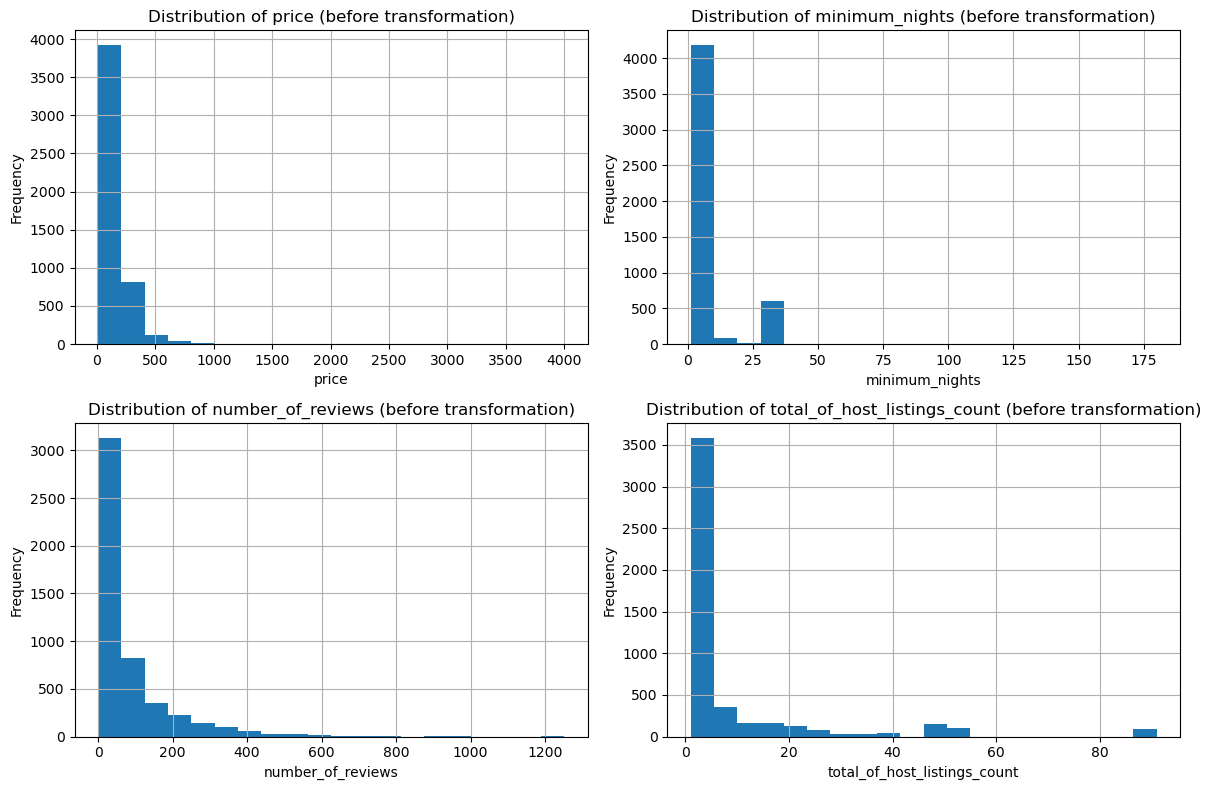

In [15]:
# Plot the original distributions
plt.figure(figsize = (12, 8))
for i, feature in enumerate(columns_with_outliers):
    plt.subplot(2, 2, i+1)
    clean_data[feature].hist(bins = 20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} (before transformation)')
plt.tight_layout()
plt.show()

In [16]:
# Apply log transformation
transformed_data = clean_data.copy()
transformed_data[columns_with_outliers] = np.log1p(transformed_data[columns_with_outliers])

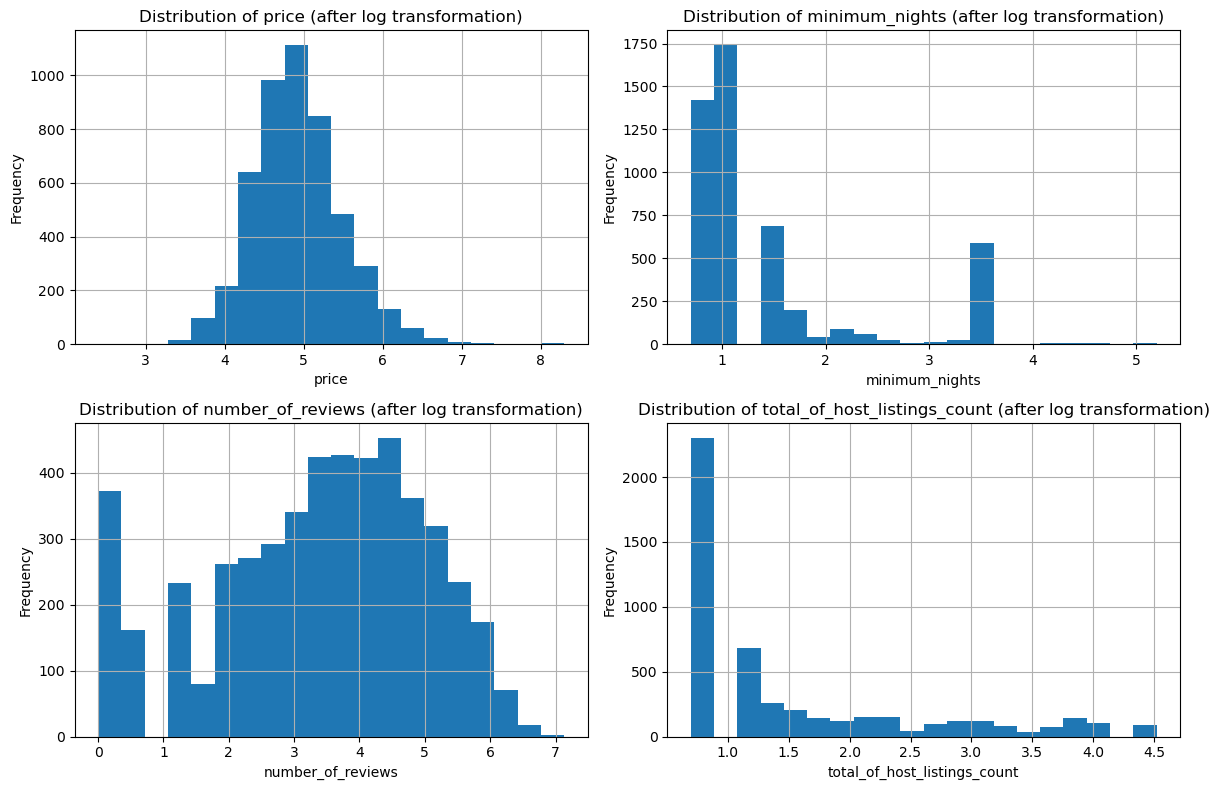

In [17]:
# Plot the transformed distributions
plt.figure(figsize = (12, 8))
for i, feature in enumerate(columns_with_outliers):
    plt.subplot(2, 2, i+1)
    transformed_data[feature].hist(bins = 20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} (after log transformation)')
plt.tight_layout()
plt.show()

**Note:** Based on the plots:

- Price: The log transformation has greatly improved the distribution of the price feature. The transformed distribution appears closer to a normal distribution, indicating a more balanced spread of prices. This transformation can be beneficial for modeling tasks that assume normality.

- Number of Reviews: The log transformation has somewhat improved the distribution of the number_of_reviews feature. While it is closer to a normal distribution compared to the original distribution, there is still room for further improvement. Additional transformations or adjustments might be necessary to achieve a more normalized distribution.

- Minimum Nights and Total Host Listings Count: The log transformation did not have a significant impact on the distributions of these features. The transformed distributions still exhibit skewness, indicating that a log transformation alone may not be sufficient to normalize these variables. Alternative transformations or different approaches may be necessary to address the skewness in these features.

Overall, the log transformation has shown promising results in improving the distribution of certain features, particularly in the case of price. However, it may not be universally effective for all variables. 

In [18]:
# so, I will save log trasformation only for price column into a dataframe: 
clean_data_encoded['price_log'] = np.log(clean_data_encoded['price'])

clean_data_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace,location_proximity,price_log
0,47.60096,-122.30190,53.0,30.0,99.0,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,-5821.687850,3.970292
1,47.65444,-122.33629,99.0,30.0,159.0,0.95,99,2,fab privat seattl urban cottag,1,...,1,0,0,0,0,0,0,0,-5829.867392,4.595120
2,47.52383,-122.35287,70.0,2.0,238.0,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,-5814.676994,4.248495
3,47.55017,-122.31937,55.0,2.0,175.0,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,-5816.306838,4.007333
4,47.66133,-122.40088,61.0,1.0,307.0,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,-5833.788734,4.110874


## Scaling/Normalization

In [19]:
# Select the columns to be scaled
columns_scaled = ['minimum_nights', 'number_of_reviews', 'total_of_host_listings_count', 'latitude', 'longitude', 'location_proximity']

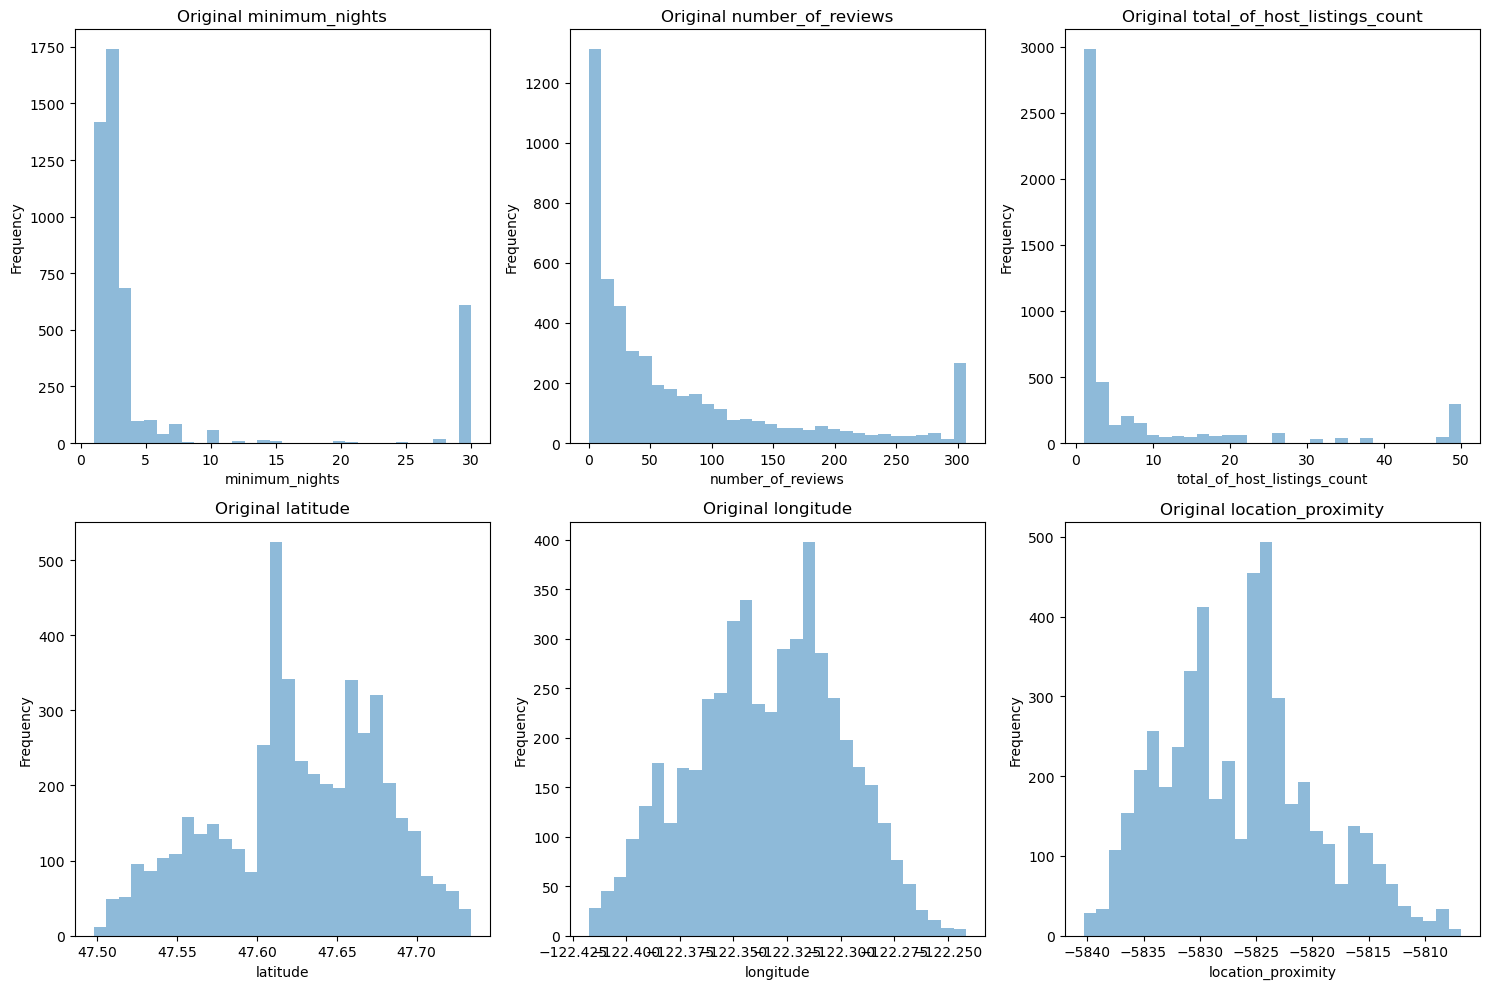

In [20]:
# Plot the distribution before scaling
plt.figure(figsize = (15, 10))
for i, feature in enumerate(columns_scaled):
    plt.subplot(2, 3, i+1)
    plt.hist(clean_data_encoded[feature], 
             bins = 30, 
             alpha = 0.5)
    
    plt.title('Original ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Apply Standard scaling
scaler = StandardScaler()

clean_data_encoded_scaled = clean_data_encoded.copy()
clean_data_encoded_scaled[columns_scaled] = scaler.fit_transform(clean_data_encoded_scaled[columns_scaled])

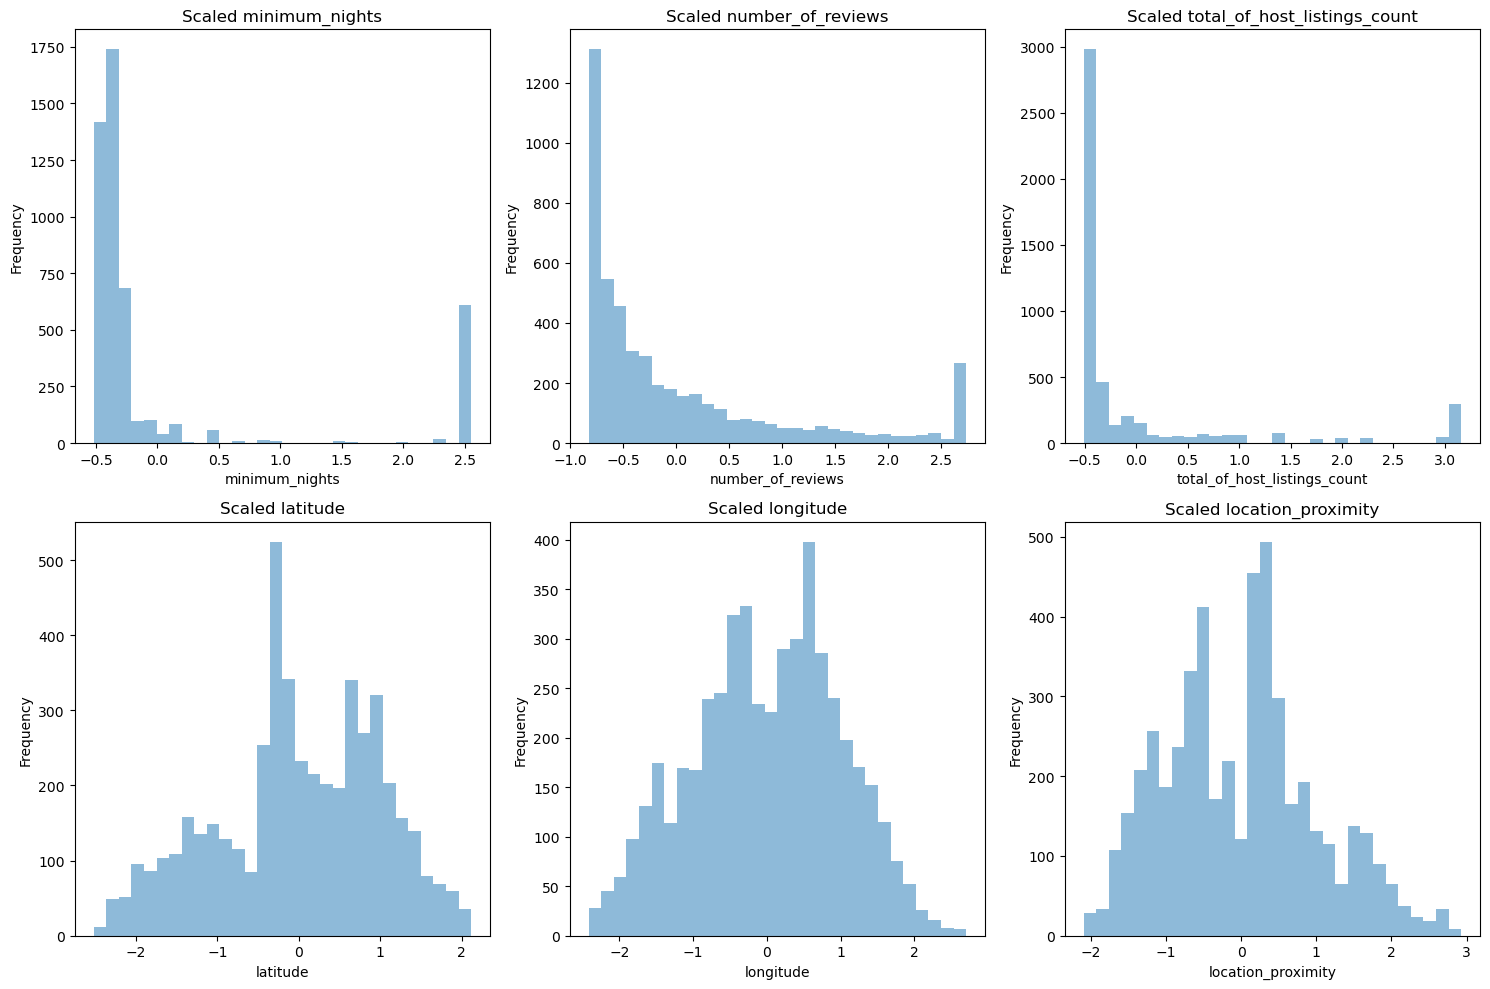

In [22]:
# Plot the distribution after scaling
plt.figure(figsize = (15, 10))
for i, feature in enumerate(columns_scaled):
    plt.subplot(2, 3, i+1)
    plt.hist(clean_data_encoded_scaled[feature], 
             bins = 30, 
             alpha = 0.5)
    
    plt.title('Scaled ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [23]:
clean_data_encoded_scaled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm,name_processed,assumed_gender,...,neighbourhood_Wallingford,neighbourhood_Wedgwood,neighbourhood_West Queen Anne,neighbourhood_West Woodland,neighbourhood_Westlake,neighbourhood_Whittier Heights,neighbourhood_Windermere,neighbourhood_Yesler Terrace,location_proximity,price_log
0,-0.495775,0.945155,53.0,2.552816,0.322248,0.80,247,4,jimi hendrix neighborhood 3,1,...,0,0,0,0,0,0,0,0,0.694221,3.970292
1,0.553648,-0.054648,99.0,2.552816,1.019036,0.95,99,2,fab privat seattl urban cottag,1,...,1,0,0,0,0,0,0,0,-0.529941,4.595120
2,-2.009275,-0.536670,70.0,-0.412954,1.936474,1.95,206,27,entir guest suit inest seattl,0,...,0,0,0,0,0,0,0,0,1.743476,4.248495
3,-1.492412,0.437259,55.0,-0.412954,1.204847,1.14,356,20,gloriou sun room memori foamb,0,...,0,0,0,0,0,0,0,0,1.499551,4.007333
4,0.688848,-1.932440,61.0,-0.518874,2.737780,2.28,209,53,seren room sunni cottag near discoveri park,1,...,0,0,0,0,0,0,0,0,-1.116814,4.110874


## Save Scaled Data

In [24]:
# save dataframe
clean_data_encoded_scaled.to_csv('../data/scaled_data.csv', index = False)

clean_data_encoded_scaled.shape

(4917, 120)